# **Entendiendo el problema**

Nuestra meta es identificar los circulos sociales de una persona y sus circulos sociales. Cada circulo es un subconjunto de sus amigos. Esto significa que podemos formular el problema de detección de circulos como un problema de agrupamiento de su ego-network.

En la siguiente figura se muestra un único usuario *u* y formamos una red con sus amigos *vi*. Nos referiremos al usuario *u* como *ego* y a sus nodos *vi* como *alters*. La tarea es identificar los circulos a que cada *vi* pertenece. 

<img src="https://i.imgur.com/Ist45yG.png" style="width:700px;">

# **Instalar librerías**

In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install python-igraph
!pip install cairocffi

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


# **Importar librerías**

In [1]:
import numpy as np
from utils_notebook import *
%matplotlib inline
import pandas as pd
from sklearn.datasets import *
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Leer el *path* al dataset

Leemos el dataset como un Pandas Dataframe para analizar los datos.

In [2]:
path = './dataset/com-youtube.ungraph.txt'
data = pd.read_csv(path, sep='\t', skiprows=3)
data.head()

,# FromNodeId,ToNodeId
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


Observamos que el dataset consta de dos columnas que nos indica las conexiones entre nodos.

In [3]:
data.columns

Index([u'# FromNodeId', u'ToNodeId'], dtype='object')

Además nos damos cuenta que hay 2987624 conexiones.

In [4]:
print("Hay", data.to_numpy().shape[0], "conexiones en el dataset de youtube")

('Hay', 2987624, 'conexiones en el dataset de youtube')


Es preciso aclarar, luego de ver las dimensiones de este dataset que, debido a la cantidad de datos para entrenar los algoritmos, estos pueden presentar demoras.

In [5]:
data.describe()

,# FromNodeId,ToNodeId
count,2.987624e+06,2.987624e+06
mean,1.875488e+05,4.128765e+05
std,2.608200e+05,3.392837e+05
min,1.000000e+00,2.000000e+00
25%,1.181500e+04,1.093080e+05
50%,7.680000e+04,3.070595e+05
75%,2.342970e+05,6.864020e+05
max,1.157804e+06,1.157827e+06


Más información acerca de cada columna. El valor máximo, menor, la media, la desviación estandar y la cantidad de datos

# Tratamiento de datos

Convertimos el dataframe a un Ndarray de numpy para pasar estos datos a los algoritmos.

In [6]:
np_data = data.to_numpy()

## K-Means and how it works

El algoritmo KMeans agrupa datos tratandolos de separar en *n* grupos de igual varianza, minimizando un criterio conocido como la inercia.

- **Agrupando los puntos en K clusters mutuamente exlusivos.**

<img src="https://media.giphy.com/media/3NKUcoyBzkXQc/giphy.gif" style="width:300px;">

- **Cómo funciona?**


1. Inicializar $K$ centroides $C = \{c_1, c_2, \ldots c_k\}$
    - Los centroides son vectores del mismo tamaño $c_i \in \mathbb{R}^{F}$
2. Cada punto es clasificado mediante el calculo de la distancia entre el mismo punto y cada centroide.
    - $\arg \min_{c_i \in C} dist(c_i, x)^{2}$
3. Basado en los puntos de clasificación, recalculamos el centro del grupo tomando la media de todos los vectores de ese grupo.
    -$c_i = \frac{1}{|c_i|}\sum_{x_i \in c_i} x_i$

4. Repetir los pasos durante un numero de iteraciones o hasta que los centroides no cambien mucho entre iteraciones.

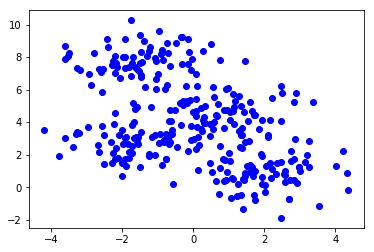

In [7]:
X, y = make_blobs(n_samples=300, centers=4, n_features=2,random_state=0)
plt.scatter(X[:,0], X[:,1], c="blue", cmap='rainbow');

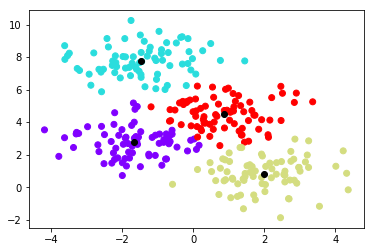

In [8]:
kmeans = KMeans(n_clusters=4)  
kmeans.fit(X)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black') 

# Entrenar el modelo y ver datos

In [9]:
kmeans_data = np_data[:1000]
kmeans = KMeans(n_clusters=7)
train_model(kmeans, kmeans_data)

('Number of labels:', 7)


Number of labels: 7
...


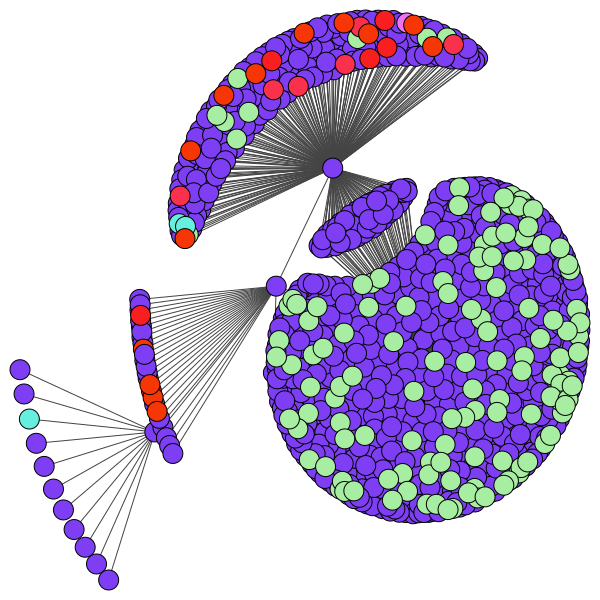

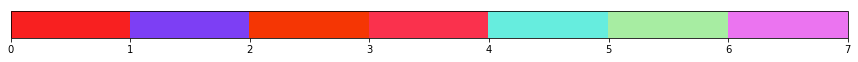

In [10]:
n_labels = len(np.unique(kmeans.labels_))
colors_kmeans = rand_cmap(n_labels, first_color_black=False)
cdict = get_color_dict(colors_kmeans)
print('...')
plot_graph(kmeans.labels_, kmeans_data, cdict, 'kmeans')

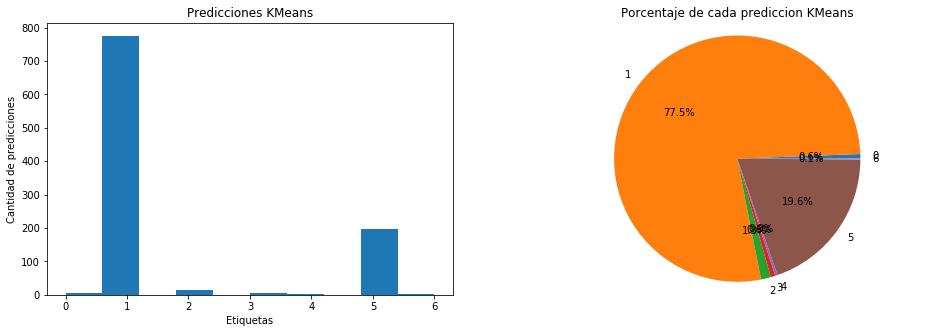

In [11]:
sizes = [100.0*np.count_nonzero(kmeans.labels_ == x)/len(kmeans.labels_) for x in np.unique(kmeans.labels_)]

fig, ax = plt.subplots(ncols=2, figsize=(16,5))

n, bins, patches = ax[0].hist(kmeans.labels_)
ax[0].set_xlabel('Etiquetas');
ax[0].set_ylabel('Cantidad de predicciones');
ax[0].set_title('Predicciones KMeans');

ax[1].pie(sizes, labels=np.unique(kmeans.labels_), autopct='%1.1f%%');
ax[1].set_title('Porcentaje de cada prediccion KMeans');
ax[1].axis('equal');

In [13]:
for label, perc in zip(np.unique(kmeans.labels_), sizes):
    print("El porcentaje para la etiqueta", label, "es del", perc)

('El porcentaje para la etiqueta', 0, 'es del', 0.6)
('El porcentaje para la etiqueta', 1, 'es del', 77.5)
('El porcentaje para la etiqueta', 2, 'es del', 1.3)
('El porcentaje para la etiqueta', 3, 'es del', 0.6)
('El porcentaje para la etiqueta', 4, 'es del', 0.3)
('El porcentaje para la etiqueta', 5, 'es del', 19.6)
('El porcentaje para la etiqueta', 6, 'es del', 0.1)
